Pour tout ce TP, travaillez dans un notebook (cf TP2) et entrainez vous à sauvegarder votre travail aux formats .ipynb et .pdf. Un notebook prérempli (avec l'énoncé) est disponible sur la page moodle du cours.
Ne pas oublier d'importer les librairies qui nous seront utiles.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

## TP4 : Statistique descriptive multivariée

Récupérez le fichier temperat.csv sur la page moodle du cours et sauvegardez-le dans votre répertoire de travail. Importez le jeu de données via la commande

In [2]:
temp = pd.read_csv('temperat.csv',sep=';')

#### 1 - Examiner le jeu de données. Combien y a-t-il d'individus ? Combien de variables quantitatives ? Combien de variables qualitatives ?

In [3]:
print("nb variables qualitatives: 2")
print("nb variables quantitatives: ", temp.shape[1]-2)
print("nb individus: ", temp.shape[0])

temp

nb variables qualitatives: 2
nb variables quantitatives:  16
nb individus:  35


,Unnamed: 0,Janvier,Fevrier,Mars,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Decembre,Moyenne,Amplitude,Latitude,Longitude,Region
0,Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4,9.9,14.6,52.2,4.5,Ouest
1,Athenes,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0,17.8,18.3,37.6,23.5,Sud
2,Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2,9.1,18.5,52.3,13.2,Ouest
3,Bruxelles,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4,10.3,14.4,50.5,4.2,Ouest
4,Budapest,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7,10.9,23.1,47.3,19.0,Est
5,Copenhague,-0.4,-0.4,1.3,5.8,11.1,15.4,17.1,16.6,13.3,8.8,4.1,1.3,7.8,17.5,55.4,12.3,Nord
6,Dublin,4.8,5.0,5.9,7.8,10.4,13.3,15.0,14.6,12.7,9.7,6.7,5.4,9.3,10.2,53.2,6.1,Nord
7,Helsinki,-5.8,-6.2,-2.7,3.1,10.2,14.0,17.2,14.9,9.7,5.2,0.1,-2.3,4.8,23.4,60.1,25.0,Nord
8,Kiev,-5.9,-5.0,-0.3,7.4,14.3,17.8,19.4,18.5,13.7,7.5,1.2,-3.6,7.1,25.3,50.3,30.3,Est
9,Cracovie,-3.7,-2.0,1.9,7.9,13.2,16.9,18.4,17.6,13.7,8.6,2.6,-1.7,7.7,22.1,50.0,19.6,Est


#### 2 - Extraire le tableau des variables quantitatives.

In [4]:
def extractQuantit(df):
    return df.select_dtypes(include=['float', 'int'])

extractQuantit(temp)
    

,Janvier,Fevrier,Mars,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Decembre,Moyenne,Amplitude,Latitude,Longitude
0,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4,9.9,14.6,52.2,4.5
1,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0,17.8,18.3,37.6,23.5
2,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2,9.1,18.5,52.3,13.2
3,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4,10.3,14.4,50.5,4.2
4,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7,10.9,23.1,47.3,19.0
5,-0.4,-0.4,1.3,5.8,11.1,15.4,17.1,16.6,13.3,8.8,4.1,1.3,7.8,17.5,55.4,12.3
6,4.8,5.0,5.9,7.8,10.4,13.3,15.0,14.6,12.7,9.7,6.7,5.4,9.3,10.2,53.2,6.1
7,-5.8,-6.2,-2.7,3.1,10.2,14.0,17.2,14.9,9.7,5.2,0.1,-2.3,4.8,23.4,60.1,25.0
8,-5.9,-5.0,-0.3,7.4,14.3,17.8,19.4,18.5,13.7,7.5,1.2,-3.6,7.1,25.3,50.3,30.3
9,-3.7,-2.0,1.9,7.9,13.2,16.9,18.4,17.6,13.7,8.6,2.6,-1.7,7.7,22.1,50.0,19.6


#### 3 - Centrer et réduire les données

In [5]:
coeur = extractQuantit(temp)

scaler = StandardScaler()
scaler.fit (coeur)
Z = scaler.transform(coeur)

#### 4 - Lancer l'ACP

In [1]:
pca = PCA(n_components = 3)

pca.fit(Z)

F = pca.fit_transform(Z)

NameError: name 'PCA' is not defined

#### 5 - Examiner les valeurs propres. Combien souhaitez-vous garder de composantes principales ?

In [7]:
l = np.array(
    [ np.var(F[: ,0]),
     np.var(F[: ,1]),
     np.var(F[: ,2])
    ]
)



I = sum(l)
lp = l/I
print("inertie expliquée par composante: ", lp)

#différent de pca.explained_variance_ratio_  ??


print("inertie expliquée cumulée: ", np.cumsum(l))

print("On peut garder seulement deux variables, ce qui nous donne 96% d'inertie expliquée")

inertie expliquée par composante:  [0.79695119 0.16225555 0.04079327]
inertie expliquée cumulée:  [12.48557928 15.02758502 15.66668006]
On peut garder seulement deux variables, ce qui nous donne 96% d'inertie expliquée


#### 6 - Extraire les facteurs

In [8]:
Gn = pca.components_

G = np.array([ Gn [0 ,:] * np.sqrt(l[0]), Gn[1,:]*np.sqrt(l[1]), Gn [2 ,:] * np.sqrt(l[2])])
G

array([[ 0.89993943,  0.92968337,  0.96989834,  0.9810219 ,  0.89939379,
         0.8580668 ,  0.85549769,  0.89712717,  0.98050118,  0.99290489,
         0.97069633,  0.91818689,  0.99807928, -0.41980383, -0.8838563 ,
        -0.37444414],
       [ 0.41351738,  0.34899099,  0.2136044 , -0.09141776, -0.38997835,
        -0.49655465, -0.48858568, -0.40196053, -0.17638952,  0.02471839,
         0.18699839,  0.35547267,  0.0187325 , -0.88828695,  0.26028579,
        -0.5882905 ],
       [-0.12167945, -0.07114111,  0.00880505,  0.04482859,  0.05030009,
         0.0383146 ,  0.03273279,  0.02838777, -0.01858365, -0.06781157,
        -0.12579621, -0.14259318, -0.03248425,  0.17041137, -0.19042783,
        -0.70979312]])

#### 7 - Tracer le cercle des corrélation dans le premier plan factoriel pour les variables

(-1.1, 1.1, -1.1, 1.1)

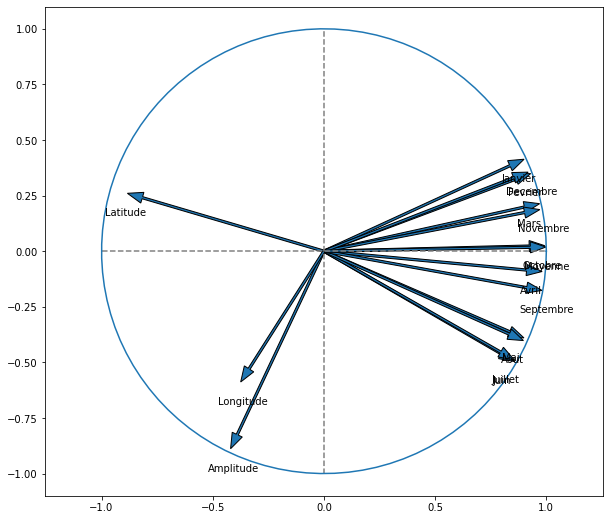

In [9]:


fig, ax = plt.subplots(figsize = (10,9))
for i in range(0,  Gn.shape[1]):
    ax.arrow(0, 0, 
             G[0, i], #On prend Gn contrairement au cours parce que ça a l'air de faire de faire du sens de prendre les coordonnées 
             G[1, i],
            head_width = 0.05, 
            head_length = 0.07, 
            width = 0.01, length_includes_head = 1)
    plt.text(G[0, i] - 0.1, 
             G[1, i] - 0.1,
             coeur.columns[i]
            )

plt.plot([-1, 1], [0, 0], color = 'grey', ls = '--')
plt.plot([0, 0],[-1, 1], color = 'grey', ls = '--')


an = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(an), np.sin(an))
plt.axis('equal')

## ??????

### Examiner le cercle des corrélation dans le premier plan factoriel pour les variables. 

#### 8 - Quelles variables sont bien représentées dans ce plan ? Quelle est la variable la moins bien représentée dans ce plan ?

In [10]:


lengths = []
for i in range (Gn.shape[1]):
    l = np.sqrt(G[0, i] ** 2 + G[1, i] **2)
    lengths.append(l)

minIndex = np.argmin(lengths)
maxIndex = np.argmax(lengths)

print('variable la mieux représentée: ', coeur.columns[maxIndex])
print('variable la moins bien représentée: ', coeur.columns[minIndex])
print('elles sont toutes pas bien représentées, donc on a dû faire une erreur')

variable la mieux représentée:  Moyenne
variable la moins bien représentée:  Longitude
elles sont toutes pas bien représentées, donc on a dû faire une erreur


#### 9 - Que pensez vous des positions relatives des variables longitude et lattitude dans ce plan ?

elles sont quasiment à angle droits donc très peu correlées

#### 10 - Que pensez vous des positions relatives des variables longitude et amplitude dans ce plan ?

elles sont quasiment à colinéaires donc très correlées

#### 11 - Quelles sont les variables qui contribuent le plus au premier axe factoriel ? Comment peut-on interpréter cet axe ? 

c'est l'axe de la longitude et de l'amplitude?

#### 12 -  Quelles sont les variables qui contribuent le plus au deuxième axe factoriel ? Comment peut-on interpréter cet axe ? 

c'est l'axe des températures

#### 13 - Quelle sont les corrélations entre variables de température mensuelle dans le plan ? Comment l'interpréter ?

les températures sont très corellées à la latitude. La latitude a beaucoup d'impact sur les températures des pays.

#### 14 - Extraire les composantes principales

In [11]:
F = pca.fit_transform(Z)

#### 15 - Tracer le nuage de point des individus projetés dans le premier plan factoriel.

Text(0, 0.5, 'axe 2')

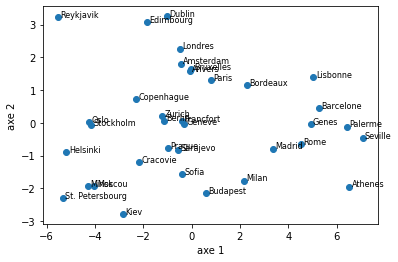

In [12]:

                          
fig, ax = plt.subplots()
ax.scatter(F[:, 0], F[:, 1])
for i, label in enumerate(temp['Unnamed: 0']):
    ax.text(F[i, 0] + 0.1, F[i, 1], label, fontsize=8)

    

ax.set_xlabel('axe 1')
ax.set_ylabel('axe 2')

### Examiner la projection des individus dans le premier plan factoriel

#### 16 - Que peut-on dire des villes qui sont le plus à droite sur premier plan factoriel ?

elles sont plus chaudes sur l'année et moins haute en latitude

#### 17 - Que peut-on dire des villes qui sont le plus à gauche sur premier plan factoriel ?

elles sont plus froides sur l'année et plus hautes en latitude

#### 18 - Que peut-on dire des villes qui sont le plus en haut sur premier plan factoriel ?

la longitude et l'amplitude de températures sont moindres

#### 19 - Que peut-on dire des villes qui sont le plus en bas sur premier plan factoriel ?

la longitude et l'amplitude de températures sont plus larges.

#### 20 - Que peut-on dire d'Oslo, Stockholm, Berlin, Francfort, Genève, Gènes et Palerme au vu de leur position sur premier plan factoriel ?

Oslo: milieu gauche

Stockholm: milieu gauche

Berlin: milieu milieu

Francfort: milieu milieu

Genève: milieu milieu

Gènes: milieu droite

Palerme:milieu droite.

elles sont toutes à peu près à la même longitude et ont la même amplitude de températures. Cependant, leur latitude et leurs températures sont croissantes.